# S5 classification and regression test on real-valued sequences

The input sequence is a length-9 vector with i.i.d. Gaussian elements. This is then dotted with a length-9 decaying exponential filter (tau=2) to produce an output y.

The classification target (output) is whether y is negative (class 0) or positive (class 1).

The regression target is just y.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

import jax
print('Using', jax.devices()[0].platform)

from disp import get_line, set_color, set_plot
from run_train import TrainArgs, train

cc = np.concatenate

if not os.path.exists('epochs_clf'):
    os.makedirs('epochs_clf')
if not os.path.exists('epochs_rgr'):
    os.makedirs('epochs_rgr')

Using gpu


# Classification test

In [2]:
DATA_DIR = 'real/clf'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='clf_real', dt_global=True, epochs=20, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_clf...
[*] Setting Randomness...
[*] Generating Real-valued Sequence Classification Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

[*] Starting S5 clf_real training on `real/clf` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1762


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:02<00:00, 10.00it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 424.82it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.61468 -- Val Loss: 0.55859 --Test Loss: 0.55859 -- Val Accuracy: 0.7850 -- Test Accuracy: 0.7850
	Best Val Loss: 0.55859 -- Best Val Accuracy: 0.7850 at Epoch 1
	Best Test Loss: 0.55859 -- Best Test Accuracy: 0.7850 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 290.82it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 432.08it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 425.42it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.55150 -- Val Loss: 0.49088 --Test Loss: 0.49088 -- Val Accuracy: 0.8150 -- Test Accuracy: 0.8150
	Best Val Loss: 0.49088 -- Best Val Accuracy: 0.8150 at Epoch 2
	Best Test Loss: 0.49088 -- Best Test Accuracy: 0.8150 at Epoch 2

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 291.77it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 433.14it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 375.68it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.47584 -- Val Loss: 0.39952 --Test Loss: 0.39952 -- Val Accuracy: 0.8550 -- Test Accuracy: 0.8550
	Best Val Loss: 0.39952 -- Best Val Accuracy: 0.8550 at Epoch 3
	Best Test Loss: 0.39952 -- Best Test Accuracy: 0.8550 at Epoch 3

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 289.90it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 429.65it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 426.67it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.36442 -- Val Loss: 0.29751 --Test Loss: 0.29751 -- Val Accuracy: 0.9050 -- Test Accuracy: 0.9050
	Best Val Loss: 0.29751 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 287.75it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 442.06it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 435.26it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.27972 -- Val Loss: 0.26074 --Test Loss: 0.26074 -- Val Accuracy: 0.8850 -- Test Accuracy: 0.8850
	Best Val Loss: 0.26074 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 290.72it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 431.20it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 444.60it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.25747 -- Val Loss: 0.25126 --Test Loss: 0.25126 -- Val Accuracy: 0.9000 -- Test Accuracy: 0.9000
	Best Val Loss: 0.25126 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 291.75it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 443.98it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 439.06it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.24360 -- Val Loss: 0.23981 --Test Loss: 0.23981 -- Val Accuracy: 0.9050 -- Test Accuracy: 0.9050
	Best Val Loss: 0.23981 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 293.91it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 428.89it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 412.43it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.24820 -- Val Loss: 0.25177 --Test Loss: 0.25177 -- Val Accuracy: 0.8900 -- Test Accuracy: 0.8900
	Best Val Loss: 0.23981 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 288.70it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 416.20it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 441.32it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.24298 -- Val Loss: 0.23708 --Test Loss: 0.23708 -- Val Accuracy: 0.9050 -- Test Accuracy: 0.9050
	Best Val Loss: 0.23708 -- Best Val Accuracy: 0.9050 at Epoch 4
	Best Test Loss: 0.29751 -- Best Test Accuracy: 0.9050 at Epoch 4

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 287.00it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 436.93it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 434.82it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.23732 -- Val Loss: 0.22290 --Test Loss: 0.22290 -- Val Accuracy: 0.9100 -- Test Accuracy: 0.9100
	Best Val Loss: 0.22290 -- Best Val Accuracy: 0.9100 at Epoch 10
	Best Test Loss: 0.22290 -- Best Test Accuracy: 0.9100 at Epoch 10

[*] Starting Training Epoch 11...
using constant lr for epoch 11


100%|██████████| 25/25 [00:00<00:00, 284.79it/s]


[*] Running Epoch 11 Validation...


100%|██████████| 7/7 [00:00<00:00, 451.58it/s]


[*] Running Epoch 11 Test...


100%|██████████| 7/7 [00:00<00:00, 426.16it/s]



=>> Epoch 11 Metrics ===
	Train Loss: 0.22954 -- Val Loss: 0.23100 --Test Loss: 0.23100 -- Val Accuracy: 0.9050 -- Test Accuracy: 0.9050
	Best Val Loss: 0.22290 -- Best Val Accuracy: 0.9100 at Epoch 10
	Best Test Loss: 0.22290 -- Best Test Accuracy: 0.9100 at Epoch 10

[*] Starting Training Epoch 12...
using constant lr for epoch 12


100%|██████████| 25/25 [00:00<00:00, 266.18it/s]


[*] Running Epoch 12 Validation...


100%|██████████| 7/7 [00:00<00:00, 409.45it/s]


[*] Running Epoch 12 Test...


100%|██████████| 7/7 [00:00<00:00, 414.64it/s]



=>> Epoch 12 Metrics ===
	Train Loss: 0.21743 -- Val Loss: 0.20877 --Test Loss: 0.20877 -- Val Accuracy: 0.9100 -- Test Accuracy: 0.9100
	Best Val Loss: 0.20877 -- Best Val Accuracy: 0.9100 at Epoch 10
	Best Test Loss: 0.22290 -- Best Test Accuracy: 0.9100 at Epoch 10

[*] Starting Training Epoch 13...
using constant lr for epoch 13


100%|██████████| 25/25 [00:00<00:00, 283.99it/s]


[*] Running Epoch 13 Validation...


100%|██████████| 7/7 [00:00<00:00, 410.58it/s]


[*] Running Epoch 13 Test...


100%|██████████| 7/7 [00:00<00:00, 423.17it/s]



=>> Epoch 13 Metrics ===
	Train Loss: 0.21509 -- Val Loss: 0.22317 --Test Loss: 0.22317 -- Val Accuracy: 0.9000 -- Test Accuracy: 0.9000
	Best Val Loss: 0.20877 -- Best Val Accuracy: 0.9100 at Epoch 10
	Best Test Loss: 0.22290 -- Best Test Accuracy: 0.9100 at Epoch 10

[*] Starting Training Epoch 14...
using constant lr for epoch 14


100%|██████████| 25/25 [00:00<00:00, 279.74it/s]


[*] Running Epoch 14 Validation...


100%|██████████| 7/7 [00:00<00:00, 426.02it/s]


[*] Running Epoch 14 Test...


100%|██████████| 7/7 [00:00<00:00, 429.79it/s]



=>> Epoch 14 Metrics ===
	Train Loss: 0.21017 -- Val Loss: 0.20226 --Test Loss: 0.20226 -- Val Accuracy: 0.9150 -- Test Accuracy: 0.9150
	Best Val Loss: 0.20226 -- Best Val Accuracy: 0.9150 at Epoch 14
	Best Test Loss: 0.20226 -- Best Test Accuracy: 0.9150 at Epoch 14

[*] Starting Training Epoch 15...
using constant lr for epoch 15


100%|██████████| 25/25 [00:00<00:00, 283.56it/s]


[*] Running Epoch 15 Validation...


100%|██████████| 7/7 [00:00<00:00, 425.05it/s]


[*] Running Epoch 15 Test...


100%|██████████| 7/7 [00:00<00:00, 412.36it/s]



=>> Epoch 15 Metrics ===
	Train Loss: 0.20398 -- Val Loss: 0.19326 --Test Loss: 0.19326 -- Val Accuracy: 0.9150 -- Test Accuracy: 0.9150
	Best Val Loss: 0.19326 -- Best Val Accuracy: 0.9150 at Epoch 14
	Best Test Loss: 0.20226 -- Best Test Accuracy: 0.9150 at Epoch 14

[*] Starting Training Epoch 16...
using constant lr for epoch 16


100%|██████████| 25/25 [00:00<00:00, 283.54it/s]


[*] Running Epoch 16 Validation...


100%|██████████| 7/7 [00:00<00:00, 428.25it/s]


[*] Running Epoch 16 Test...


100%|██████████| 7/7 [00:00<00:00, 423.74it/s]



=>> Epoch 16 Metrics ===
	Train Loss: 0.19508 -- Val Loss: 0.20508 --Test Loss: 0.20508 -- Val Accuracy: 0.9100 -- Test Accuracy: 0.9100
	Best Val Loss: 0.19326 -- Best Val Accuracy: 0.9150 at Epoch 14
	Best Test Loss: 0.20226 -- Best Test Accuracy: 0.9150 at Epoch 14

[*] Starting Training Epoch 17...
using constant lr for epoch 17


100%|██████████| 25/25 [00:00<00:00, 279.31it/s]


[*] Running Epoch 17 Validation...


100%|██████████| 7/7 [00:00<00:00, 435.46it/s]


[*] Running Epoch 17 Test...


100%|██████████| 7/7 [00:00<00:00, 430.56it/s]



=>> Epoch 17 Metrics ===
	Train Loss: 0.19357 -- Val Loss: 0.18623 --Test Loss: 0.18623 -- Val Accuracy: 0.9200 -- Test Accuracy: 0.9200
	Best Val Loss: 0.18623 -- Best Val Accuracy: 0.9200 at Epoch 17
	Best Test Loss: 0.18623 -- Best Test Accuracy: 0.9200 at Epoch 17

[*] Starting Training Epoch 18...
using constant lr for epoch 18


100%|██████████| 25/25 [00:00<00:00, 280.48it/s]


[*] Running Epoch 18 Validation...


100%|██████████| 7/7 [00:00<00:00, 409.90it/s]


[*] Running Epoch 18 Test...


100%|██████████| 7/7 [00:00<00:00, 420.91it/s]



=>> Epoch 18 Metrics ===
	Train Loss: 0.18323 -- Val Loss: 0.18887 --Test Loss: 0.18887 -- Val Accuracy: 0.9100 -- Test Accuracy: 0.9100
	Best Val Loss: 0.18623 -- Best Val Accuracy: 0.9200 at Epoch 17
	Best Test Loss: 0.18623 -- Best Test Accuracy: 0.9200 at Epoch 17

[*] Starting Training Epoch 19...
using constant lr for epoch 19


100%|██████████| 25/25 [00:00<00:00, 266.37it/s]


[*] Running Epoch 19 Validation...


100%|██████████| 7/7 [00:00<00:00, 421.76it/s]


[*] Running Epoch 19 Test...


100%|██████████| 7/7 [00:00<00:00, 420.96it/s]



=>> Epoch 19 Metrics ===
	Train Loss: 0.18519 -- Val Loss: 0.17341 --Test Loss: 0.17341 -- Val Accuracy: 0.9300 -- Test Accuracy: 0.9300
	Best Val Loss: 0.17341 -- Best Val Accuracy: 0.9300 at Epoch 19
	Best Test Loss: 0.17341 -- Best Test Accuracy: 0.9300 at Epoch 19

[*] Starting Training Epoch 20...
using constant lr for epoch 20


100%|██████████| 25/25 [00:00<00:00, 282.30it/s]


[*] Running Epoch 20 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.47it/s]


[*] Running Epoch 20 Test...


100%|██████████| 7/7 [00:00<00:00, 442.17it/s]


=>> Epoch 20 Metrics ===
	Train Loss: 0.17462 -- Val Loss: 0.16323 --Test Loss: 0.16323 -- Val Accuracy: 0.9250 -- Test Accuracy: 0.9250
	Best Val Loss: 0.16323 -- Best Val Accuracy: 0.9300 at Epoch 19
	Best Test Loss: 0.17341 -- Best Test Accuracy: 0.9300 at Epoch 19



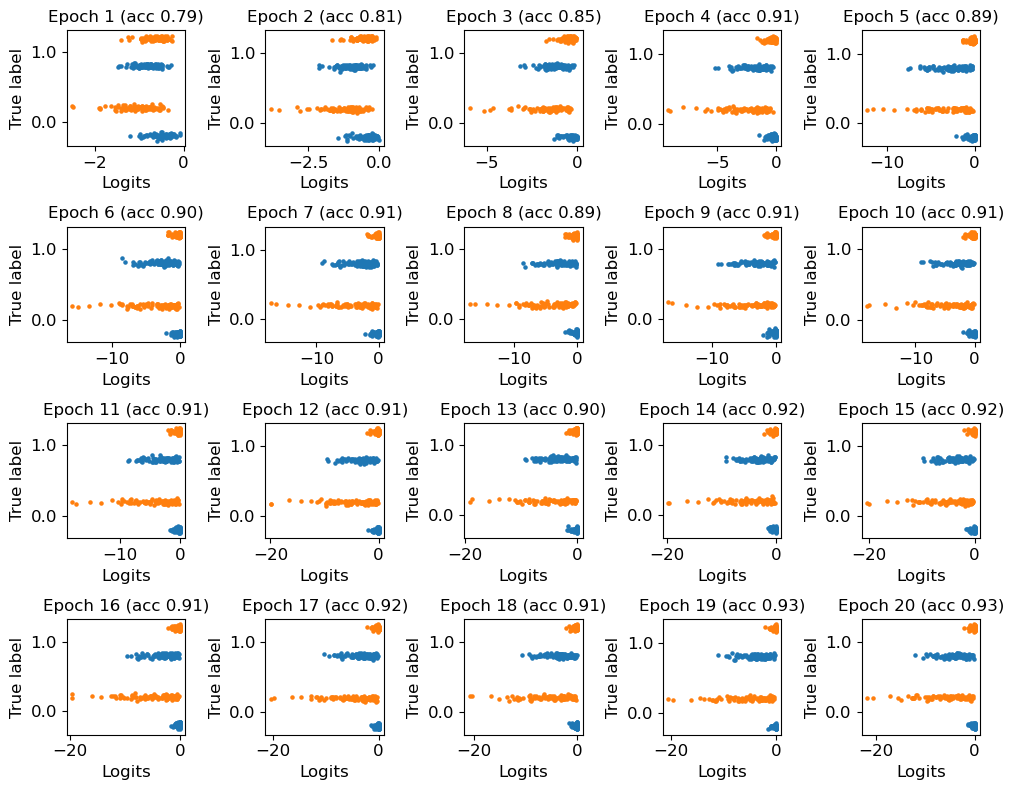

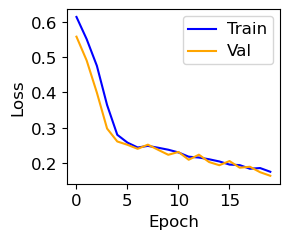

In [3]:
from disp import colors

# load results
fig, axs = plt.subplots(4, 5, figsize=(10, 8), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    acc = np.mean(targs == preds.argmax(1))
    
    labels = np.sort(np.unique(targs))
    y_ticks = []
    
    for clabel_0, label_0 in enumerate(labels):
        for clabel_1, label_1 in enumerate(labels):
            logits = preds[targs==label_0, clabel_1]
            display_jitter = .02*np.random.randn(len(logits))
            ax.scatter(logits, np.zeros(len(logits)) + clabel_0 + .8*clabel_1/len(labels) + display_jitter, c=colors[clabel_1], s=5)
            
        y_ticks.append(clabel_0 + .2)
    
    set_plot(ax, y_ticks=y_ticks, y_tick_labels=labels, x_label='Logits', y_label='True label', title=f'Epoch {cepoch+1} (acc {acc:.2f})')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

# Regression test

In [4]:
DATA_DIR = 'real/rgr'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='rgr_real', dt_global=True, epochs=20, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_rgr...
[*] Setting Randomness...
[*] Generating Real-valued Sequence Regression Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

[*] Starting S5 rgr_real training on `real/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


configuring standard optimization setup
[*] Trainable Parameters: 1753
[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:02<00:00, 12.05it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 415.93it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.73564 -- Val Loss: 0.65635 --Test Loss: 0.65635 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.65635 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 298.33it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 429.81it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 409.37it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.56820 -- Val Loss: 0.45233 --Test Loss: 0.45233 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.45233 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 302.09it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 443.81it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 440.64it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.38813 -- Val Loss: 0.30615 --Test Loss: 0.30615 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.30615 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 305.53it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 447.29it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 452.20it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.30734 -- Val Loss: 0.25441 --Test Loss: 0.25441 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.25441 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 312.56it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 440.40it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 451.63it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.24826 -- Val Loss: 0.21154 --Test Loss: 0.21154 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.21154 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 301.35it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 424.30it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 436.69it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.20611 -- Val Loss: 0.19902 --Test Loss: 0.19902 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.19902 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 301.18it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.88it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 443.15it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.19375 -- Val Loss: 0.19210 --Test Loss: 0.19210 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.19210 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 300.02it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 421.20it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 442.79it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.20158 -- Val Loss: 0.19564 --Test Loss: 0.19564 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.19210 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 300.24it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 429.81it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 458.54it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.19140 -- Val Loss: 0.19902 --Test Loss: 0.19902 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.19210 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 299.74it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 439.63it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 445.52it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.19090 -- Val Loss: 0.18108 --Test Loss: 0.18108 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.18108 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 11...
using constant lr for epoch 11


100%|██████████| 25/25 [00:00<00:00, 306.09it/s]


[*] Running Epoch 11 Validation...


100%|██████████| 7/7 [00:00<00:00, 421.34it/s]


[*] Running Epoch 11 Test...


100%|██████████| 7/7 [00:00<00:00, 447.03it/s]



=>> Epoch 11 Metrics ===
	Train Loss: 0.18101 -- Val Loss: 0.18351 --Test Loss: 0.18351 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.18108 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 12...
using constant lr for epoch 12


100%|██████████| 25/25 [00:00<00:00, 301.48it/s]


[*] Running Epoch 12 Validation...


100%|██████████| 7/7 [00:00<00:00, 422.67it/s]


[*] Running Epoch 12 Test...


100%|██████████| 7/7 [00:00<00:00, 344.09it/s]



=>> Epoch 12 Metrics ===
	Train Loss: 0.16196 -- Val Loss: 0.15291 --Test Loss: 0.15291 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.15291 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 13...
using constant lr for epoch 13


100%|██████████| 25/25 [00:00<00:00, 303.58it/s]


[*] Running Epoch 13 Validation...


100%|██████████| 7/7 [00:00<00:00, 440.15it/s]


[*] Running Epoch 13 Test...


100%|██████████| 7/7 [00:00<00:00, 424.68it/s]



=>> Epoch 13 Metrics ===
	Train Loss: 0.15498 -- Val Loss: 0.14191 --Test Loss: 0.14191 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.14191 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 14...
using constant lr for epoch 14


100%|██████████| 25/25 [00:00<00:00, 302.77it/s]


[*] Running Epoch 14 Validation...


100%|██████████| 7/7 [00:00<00:00, 434.05it/s]


[*] Running Epoch 14 Test...


100%|██████████| 7/7 [00:00<00:00, 441.25it/s]



=>> Epoch 14 Metrics ===
	Train Loss: 0.13506 -- Val Loss: 0.12449 --Test Loss: 0.12449 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.12449 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 15...
using constant lr for epoch 15


100%|██████████| 25/25 [00:00<00:00, 304.77it/s]


[*] Running Epoch 15 Validation...


100%|██████████| 7/7 [00:00<00:00, 448.14it/s]


[*] Running Epoch 15 Test...


100%|██████████| 7/7 [00:00<00:00, 432.34it/s]



=>> Epoch 15 Metrics ===
	Train Loss: 0.12687 -- Val Loss: 0.10177 --Test Loss: 0.10177 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.10177 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 16...
using constant lr for epoch 16


100%|██████████| 25/25 [00:00<00:00, 300.33it/s]


[*] Running Epoch 16 Validation...


100%|██████████| 7/7 [00:00<00:00, 426.46it/s]


[*] Running Epoch 16 Test...


100%|██████████| 7/7 [00:00<00:00, 457.69it/s]



=>> Epoch 16 Metrics ===
	Train Loss: 0.10421 -- Val Loss: 0.12199 --Test Loss: 0.12199 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.10177 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 17...
using constant lr for epoch 17


100%|██████████| 25/25 [00:00<00:00, 298.13it/s]


[*] Running Epoch 17 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.88it/s]


[*] Running Epoch 17 Test...


100%|██████████| 7/7 [00:00<00:00, 432.56it/s]



=>> Epoch 17 Metrics ===
	Train Loss: 0.09248 -- Val Loss: 0.06930 --Test Loss: 0.06930 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.06930 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 18...
using constant lr for epoch 18


100%|██████████| 25/25 [00:00<00:00, 304.73it/s]


[*] Running Epoch 18 Validation...


100%|██████████| 7/7 [00:00<00:00, 430.02it/s]


[*] Running Epoch 18 Test...


100%|██████████| 7/7 [00:00<00:00, 455.93it/s]



=>> Epoch 18 Metrics ===
	Train Loss: 0.08848 -- Val Loss: 0.06953 --Test Loss: 0.06953 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.06930 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 19...
using constant lr for epoch 19


100%|██████████| 25/25 [00:00<00:00, 285.85it/s]


[*] Running Epoch 19 Validation...


100%|██████████| 7/7 [00:00<00:00, 442.78it/s]


[*] Running Epoch 19 Test...


100%|██████████| 7/7 [00:00<00:00, 433.05it/s]



=>> Epoch 19 Metrics ===
	Train Loss: 0.08801 -- Val Loss: 0.07570 --Test Loss: 0.07570 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.06930 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 20...
using constant lr for epoch 20


100%|██████████| 25/25 [00:00<00:00, 303.95it/s]


[*] Running Epoch 20 Validation...


100%|██████████| 7/7 [00:00<00:00, 421.97it/s]


[*] Running Epoch 20 Test...


100%|██████████| 7/7 [00:00<00:00, 442.97it/s]


=>> Epoch 20 Metrics ===
	Train Loss: 0.07449 -- Val Loss: 0.07361 --Test Loss: 0.07361 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.06930 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



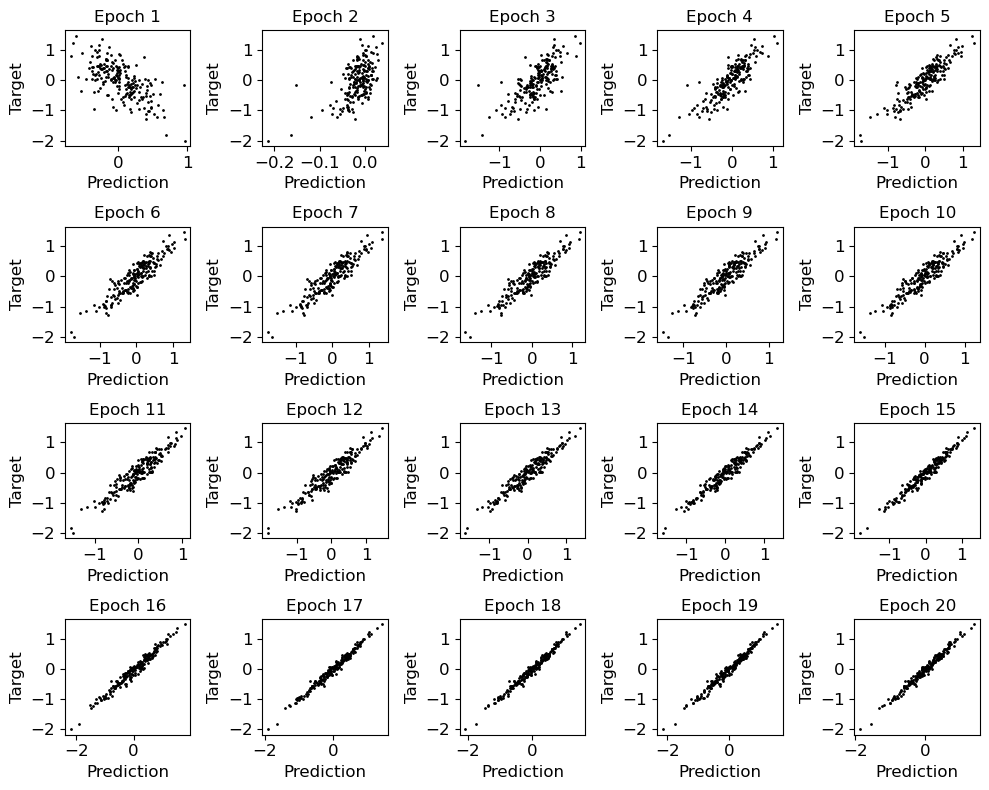

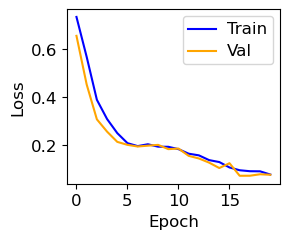

In [5]:
# load results
fig, axs = plt.subplots(4, 5, figsize=(10, 8), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')